# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [2]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_80_run5/result-lstm-tcp80-hl2-seq4-do0.2-oov2500-part_9_Treatment_testing_80.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_80/part_9_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [3]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.16-38982-23.60.139.27-80-tcp,0.471545,1,1,1,87533.577596,0,1,1
1,192.168.10.9-21864-68.67.178.111-80-tcp,0.081310,0,1,1,56779.814357,0,1,1
2,192.168.10.14-54469-104.16.24.216-80-tcp,0.394273,1,1,1,86642.275556,0,1,1
3,192.168.10.16-39628-178.255.83.1-80-tcp,0.574713,1,1,1,668372.454756,1,1,1
4,192.168.10.14-51595-23.65.11.27-80-tcp,0.553444,1,1,1,237516.141487,1,1,1


In [4]:
df_truth.head()

,ID,Label
0,192.168.10.16-38982-23.60.139.27-80-tcp,BENIGN
1,192.168.10.9-21864-68.67.178.111-80-tcp,BENIGN
2,192.168.10.14-54469-104.16.24.216-80-tcp,BENIGN
3,192.168.10.16-39628-178.255.83.1-80-tcp,BENIGN
4,192.168.10.14-51595-23.65.11.27-80-tcp,BENIGN


In [5]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        22418
1         6705
Name: count, dtype: int64

## Exploratory Data Analysis

In [6]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        22418
1         6705
Name: count, dtype: int64

In [7]:
df_pred[['b_zscore']].value_counts()

b_zscore
0           22434
1            6689
Name: count, dtype: int64

In [8]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [9]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [10]:
df_pred["id"]

0         192.168.10.16-38982-23.60.139.27-80-tcp
1         192.168.10.9-21864-68.67.178.111-80-tcp
2        192.168.10.14-54469-104.16.24.216-80-tcp
3         192.168.10.16-39628-178.255.83.1-80-tcp
4          192.168.10.14-51595-23.65.11.27-80-tcp
                           ...                   
29118      192.168.10.8-53898-178.255.83.1-80-tcp
29119      192.168.10.8-49916-172.217.11.3-80-tcp
29120     192.168.10.19-51032-23.61.187.27-80-tcp
29121      192.168.10.8-59579-52.5.149.245-80-tcp
29122      192.168.10.15-49898-23.37.43.27-80-tcp
Name: id, Length: 29123, dtype: object

In [11]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0         192.168.10.16-38982-23.60.139.27-80-tcp
1         192.168.10.9-21864-68.67.178.111-80-tcp
2        192.168.10.14-54469-104.16.24.216-80-tcp
3         192.168.10.16-39628-178.255.83.1-80-tcp
4          192.168.10.14-51595-23.65.11.27-80-tcp
                           ...                   
29118      192.168.10.8-53898-178.255.83.1-80-tcp
29119      192.168.10.8-49916-172.217.11.3-80-tcp
29120     192.168.10.19-51032-23.61.187.27-80-tcp
29121      192.168.10.8-59579-52.5.149.245-80-tcp
29122      192.168.10.15-49898-23.37.43.27-80-tcp
Name: ID, Length: 29123, dtype: object

In [12]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [13]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [14]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
5911,172.16.0.1-45370-192.168.10.50-80-tcp,0.021798,0,0,0,11217.617080,0,0,0,1
5912,172.16.0.1-45072-192.168.10.50-80-tcp,0.061594,0,1,1,44901.381387,0,1,1,1
5913,172.16.0.1-45072-192.168.10.50-80-tcp,0.061594,0,1,1,44901.381387,0,1,1,1
5914,172.16.0.1-59114-192.168.10.50-80-tcp,0.023121,0,0,0,11218.213450,0,0,0,1
5915,172.16.0.1-59114-192.168.10.50-80-tcp,0.023121,0,0,0,11218.213450,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
67481,172.16.0.1-39942-192.168.10.50-80-tcp,0.028249,0,0,0,13452.320000,0,0,0,1
67482,172.16.0.1-58176-192.168.10.50-80-tcp,0.031250,0,0,0,14817.041139,0,0,0,1
67483,172.16.0.1-58176-192.168.10.50-80-tcp,0.031250,0,0,0,14817.041139,0,0,0,1
67484,172.16.0.1-58176-192.168.10.50-80-tcp,0.031250,0,0,0,14817.041139,0,0,0,1


In [15]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.16-38982-23.60.139.27-80-tcp,0.471545,1,1,1,87533.577596,0,1,1,0
1,192.168.10.9-21864-68.67.178.111-80-tcp,0.081310,0,1,1,56779.814357,0,1,1,0
2,192.168.10.14-54469-104.16.24.216-80-tcp,0.394273,1,1,1,86642.275556,0,1,1,0
3,192.168.10.16-39628-178.255.83.1-80-tcp,0.574713,1,1,1,668372.454756,1,1,1,0
4,192.168.10.14-51595-23.65.11.27-80-tcp,0.553444,1,1,1,237516.141487,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
70830,192.168.10.8-53898-178.255.83.1-80-tcp,0.542725,1,1,1,670086.354312,1,1,1,0
70831,192.168.10.8-49916-172.217.11.3-80-tcp,0.380952,1,1,1,214050.190211,1,1,1,0
70832,192.168.10.19-51032-23.61.187.27-80-tcp,0.576074,1,1,1,507334.896149,1,1,1,0
70833,192.168.10.8-59579-52.5.149.245-80-tcp,0.424686,1,1,1,284412.742616,1,1,1,0


In [16]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.16-38982-23.60.139.27-80-tcp,0.471545,1,1,1,87533.577596,0,1,1,0
1,192.168.10.9-21864-68.67.178.111-80-tcp,0.081310,0,1,1,56779.814357,0,1,1,0
2,192.168.10.14-54469-104.16.24.216-80-tcp,0.394273,1,1,1,86642.275556,0,1,1,0
3,192.168.10.16-39628-178.255.83.1-80-tcp,0.574713,1,1,1,668372.454756,1,1,1,0
4,192.168.10.14-51595-23.65.11.27-80-tcp,0.553444,1,1,1,237516.141487,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
70830,192.168.10.8-53898-178.255.83.1-80-tcp,0.542725,1,1,1,670086.354312,1,1,1,0
70831,192.168.10.8-49916-172.217.11.3-80-tcp,0.380952,1,1,1,214050.190211,1,1,1,0
70832,192.168.10.19-51032-23.61.187.27-80-tcp,0.576074,1,1,1,507334.896149,1,1,1,0
70833,192.168.10.8-59579-52.5.149.245-80-tcp,0.424686,1,1,1,284412.742616,1,1,1,0


In [17]:
df_pred[['Label']].value_counts()

Label
1        61575
0         9260
Name: count, dtype: int64

In [18]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [19]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [20]:
df_pred[['b_zscore']]

,b_zscore
0,1
1,1
2,1
3,1
4,1
...,...
70830,1
70831,1
70832,1
70833,1


### Detection Rate

In [21]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.000146163215590743
Recall-Binary-b_iqr: 0.06678034916768169
Recall-Binary-b_zscore: 0.06634185952090946
Recall-Floating-f_mean: 9.7442143727162e-05
Recall-Floating-f_iqr: 0.06671538773853025
Recall-Floating-f_zscore: 0.06643930166463662


### Confussion Matrix

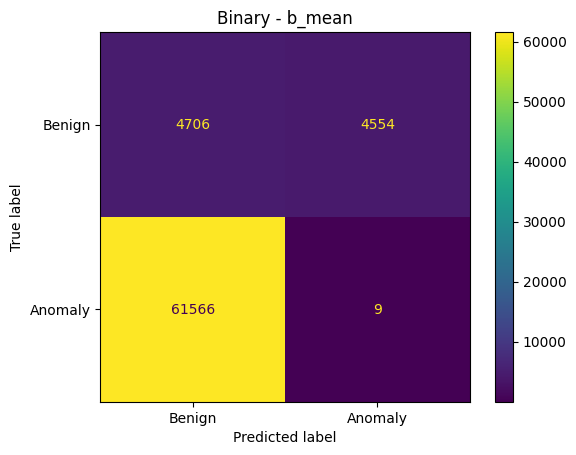

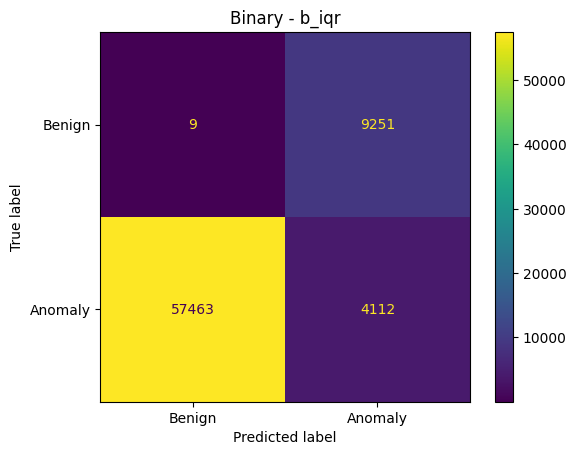

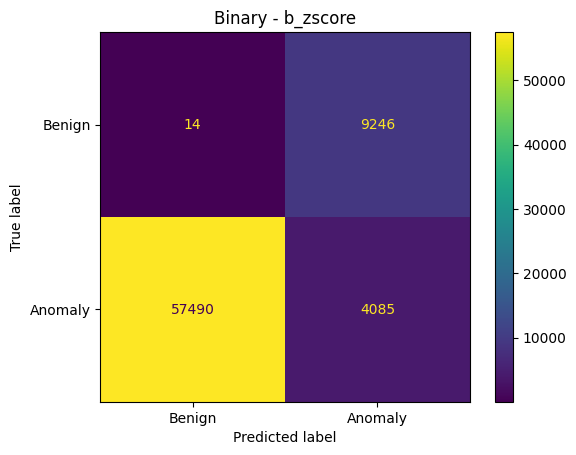

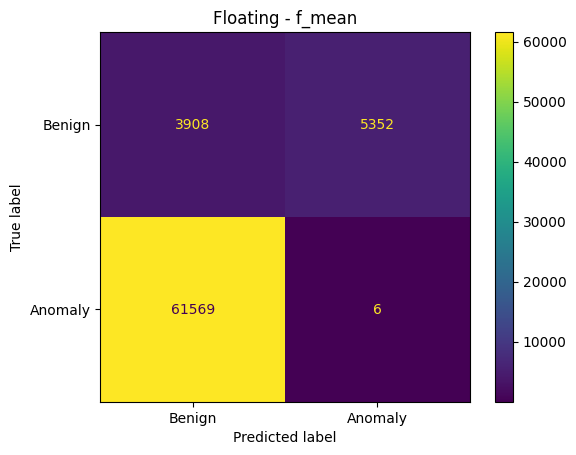

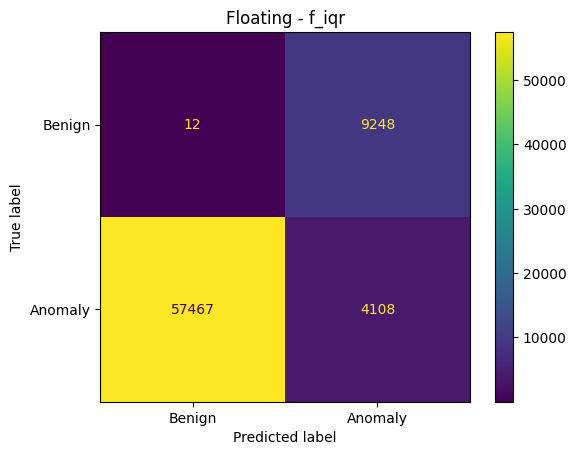

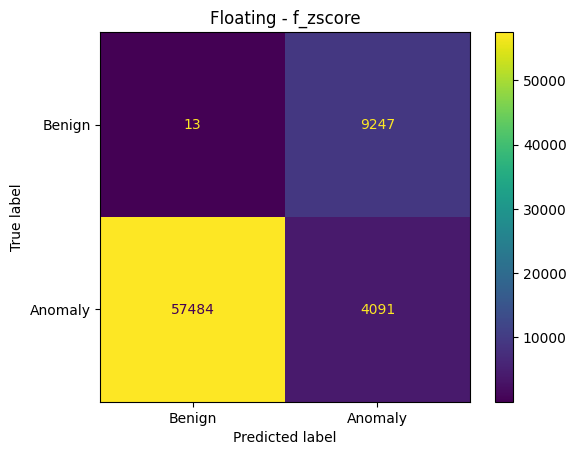

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [23]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.00017938077755587711
F2-Binary-b_iqr: 0.07917955195772983
F2-Binary-b_zscore: 0.07866934225882118
F2-Floating-f_mean: 0.00011920940323772739
F2-Floating-f_iqr: 0.07910466155220754
F2-Floating-f_zscore: 0.07878276677527943


### FPR Score

In [24]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.491792656587473
FPR-Binary-b_iqr: 0.9990280777537797
FPR-Binary-b_zscore: 0.998488120950324
FPR-Floating-f_mean: 0.5779697624190064
FPR-Floating-f_iqr: 0.9987041036717063
FPR-Floating-f_zscore: 0.9985961123110151


In [25]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.0665631396908308
Accuracy-Binary-b_iqr: 0.058177454648125924
Accuracy-Binary-b_zscore: 0.057866873720618335
Accuracy-Floating-f_mean: 0.055255170466577255
Accuracy-Floating-f_iqr: 0.058163337333239216
Accuracy-Floating-f_zscore: 0.05793746029505188


In [26]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.000146,0.000179,0.491793,0.066563
b_iqr,0.066780,0.079180,0.999028,0.058177
b_zscore,0.066342,0.078669,0.998488,0.057867
f_mean,0.000097,0.000119,0.577970,0.055255
f_iqr,0.066715,0.079105,0.998704,0.058163
f_zscore,0.066439,0.078783,0.998596,0.057937


In [27]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [28]:
# %pip install openpyxl